# Applied Data Science Capstone - The Battle of Neighborhoods Week5

## 1. Introduction of this project - A data journey to London

The other day I received an email from a friend of mine in Japan and he told me he has received an attractive offer from a company in London. He is now planning to relocate with his wife and a 4-year-old boy.
However, he has no experience of living abroad and do not have a clue where to start with finding a right information of the neighborhood there. 
So I have decided to help him with my newly acquired skill of data analysis from the data science course at Coursera.

### Goal of the project: To find suitable accommodation areas inside/around London for a family with a small kid.

## 2. Data

I first decided to check the crime rate as it is usually the most importatant condition for a family with small children. I also know that they love Asian cuisine and they cannot live without it. So this needs to be taken into account as well.

### Target: Find an area(s) with 1) Low Criminal Rate and 2) Good access to Asian cuisine  (Extra - (if possible) good access to Metro station(s) )

### Data source

#### 1) Criminal Record in London - https://data.london.gov.uk/dataset/recorded_crime_summary (MPS Borough Level Crime in csv format)
#### 2) Geographical coordinate fo Boroughs and Wards in London - https://data.london.gov.uk/dataset/excel-mapping-template-for-london-boroughs-and-wards
#### 3) Neighborhood Venues - with Foursquare API.
#### (4) Location of Metro Stations in London - https://www.doogal.co.uk/london_stations.php (Name of the station, Geographical coordinate(longitute, latititude))

1) Criminal Record in London includes the category of crime, Borough Name and the number of crimes for each month from June.2018 till May, 2020. 

2) Geographical coordinate of Boroughs and Wards in London recquires cleaning as they are not in one file.

## 3. Data Analysis

Importing libraries

In [1]:
import numpy as np 
import pandas as pd

import json

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium # map rendering library


### Let's start looking at the data set from Crime Data in London

In [85]:
df_crime_csv = pd.read_csv('MPS Borough Level Crime (most recent 24 months).csv')
df_crime_csv
#df_crime.shape

,MajorText,MinorText,LookUp_BoroughName,201806,201807,201808,201809,201810,201811,201812,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,12,6,5,3,8,5,1,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,127,101,107,132,105,88,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,30,18,33,32,39,33,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,77,94,84,99,94,106,164,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,8,7,10,7,7,4,...,7,7,10,12,3,13,4,6,11,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1561,Vehicle Offences,Theft from a Motor Vehicle,Westminster,267,243,223,258,316,290,274,...,250,270,352,300,382,317,345,230,58,102
1562,Vehicle Offences,Theft or Taking of a Motor Vehicle,Westminster,58,67,66,70,75,52,36,...,63,56,56,58,53,74,56,53,32,40
1563,Violence Against the Person,Homicide,Westminster,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1564,Violence Against the Person,Violence with Injury,Westminster,302,350,333,315,309,310,365,...,403,313,328,364,363,297,274,258,126,238


In [90]:
print('There are {} Boroughs in this dataframe.'.format(df_crime_csv['LookUp_BoroughName'].unique().shape[0]))
print('They are {}'.format(df_crime['LookUp_BoroughName'].unique()))

There are 33 Boroughs in this dataframe.
They are ['Barking and Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley' 'Camden'
 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith and Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington and Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'London Heathrow and London City Airports' 'Merton'
 'Newham' 'Redbridge' 'Richmond upon Thames' 'Southwark' 'Sutton'
 'Tower Hamlets' 'Waltham Forest' 'Wandsworth' 'Westminster']


#### Let's check the categories of the crimes

In [93]:
print('There are {} types of Major Crimes in this dataframe.'.format(df_crime_csv['MajorText'].unique().shape[0]))
print('They are {}.'.format(df_crime_csv['MajorText'].unique()))

There are 11 types of Major Crimes in this dataframe.
They are ['Arson and Criminal Damage' 'Burglary' 'Drug Offences'
 'Miscellaneous Crimes Against Society' 'Possession of Weapons'
 'Public Order Offences' 'Robbery' 'Sexual Offences' 'Theft'
 'Vehicle Offences' 'Violence Against the Person'].


In [96]:
print('There are {} sub-categories of crimes in this dataframe.'.format(df_crime_csv['MinorText'].unique().shape[0]))
#print('They are {}.'.format(df_crime_csv['MinorText'].unique()))

There are 53 sub-categories of crimes in this dataframe.


#### Cleaninup the dataframe for visualization

Dropping column of 'MinorText' and swapping Borough and Major Crimes

In [97]:
df_crime_ = df_crime_csv.drop(columns='MinorText',inplace=False)
columns_ = np.array(df_crime_.columns)
columns_[0] = np.array(df_crime_.columns)[1]
columns_[1] = np.array(df_crime_.columns)[0]
columns_

df_crime=df_crime_.reindex(columns=columns_)
df_crime.head()

,LookUp_BoroughName,MajorText,201806,201807,201808,201809,201810,201811,201812,201901,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Barking and Dagenham,Arson and Criminal Damage,12,6,5,3,8,5,1,5,...,3,6,9,8,6,4,5,6,2,2
1,Barking and Dagenham,Arson and Criminal Damage,123,127,101,107,132,105,88,97,...,118,109,109,97,121,97,103,107,80,88
2,Barking and Dagenham,Burglary,33,30,18,33,32,39,33,45,...,35,37,30,30,25,31,17,28,29,16
3,Barking and Dagenham,Burglary,77,94,84,99,94,106,164,114,...,67,80,97,114,130,116,123,97,57,41
4,Barking and Dagenham,Drug Offences,6,8,7,10,7,7,4,5,...,7,7,10,12,3,13,4,6,11,11


Let's sum up the numbers of criminal case for Major crime categories.

In [76]:
for i in range(len()

""


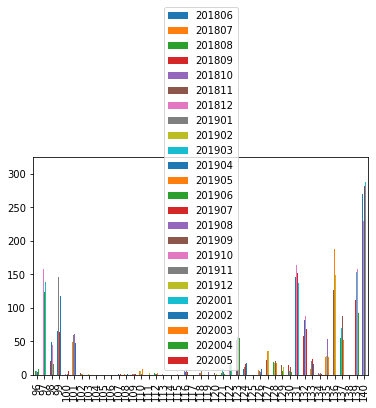

In [138]:
ax = df_test.plot.bar()